In [1]:
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(suppress=True)

import seaborn as sns
%matplotlib inline

In [62]:
match_id_list = [2719060322,
 2720141598,
 2737314939,
 2746516932,
 2749098820,
 2756865141,
 2761396673,
 2765041861,
 2765143572,
 2769748980,
 2771534907,
 2772371484,
 2778323149,
 2780757506,
 2781361647,
 2781615740,
 2783630957,
 2784651369,
 2787699111,
 2788017115,
 2788582633]

In [298]:
match_id = match_id_list[4]
file = './dat/match_' + str(match_id) + '.json'

with open(file,'r') as fp:
    match = json.load(fp)

In [299]:
match.keys()

dict_keys(['gameId', 'platformId', 'gameCreation', 'gameDuration', 'queueId', 'mapId', 'seasonId', 'gameVersion', 'gameMode', 'gameType', 'teams', 'participants', 'participantIdentities'])

In [300]:
winner = (match['teams'][0]['win'] == 'Fail')*1
winner

0

In [301]:
total_gold = []
for i in range(10):
    total_gold.append(match['participants'][i]['stats']['goldEarned'])

In [302]:
team_0_gold = np.sum(total_gold[:5])
team_1_gold = np.sum(total_gold[5:])
team_diff = team_0_gold - team_1_gold
print(team_0_gold, team_1_gold, team_diff)

83242 76069 7173


In [303]:
file = './dat/timeline_' + str(match_id) + '.json'

with open(file,'r') as fp:
    match2 = json.load(fp)

In [304]:
def calculate_team_total_and_difference(dat, frames):
    team_total = np.array([np.sum(dat[:,:5],axis=1),np.sum(dat[:,5:],axis=1)]).transpose()
    team_total_diff = np.concatenate((team_total,(team_total[:,0] - team_total[:,1]).reshape((frames,1))),axis=1)
    return team_total_diff

def get_dat(match):
    current_gold = []
    total_gold = []
    xp = []
    frames = len(match['frames'])
    for frame in range(frames):
        frame_current_gold = []
        frame_total_gold = []
        frame_xp = []
        for i in range(1,11):
            frame_current_gold.append(match['frames'][frame]['participantFrames'][str(i)]['currentGold'])
            frame_total_gold.append(match['frames'][frame]['participantFrames'][str(i)]['totalGold'])
            frame_xp.append(match['frames'][frame]['participantFrames'][str(i)]['xp'])
        current_gold.append(frame_current_gold)
        total_gold.append(frame_total_gold)
        xp.append(frame_xp)
        
    team_current_gold = calculate_team_total_and_difference(np.array(current_gold), frames)
    team_total_gold = calculate_team_total_and_difference(np.array(total_gold), frames)
    team_xp = calculate_team_total_and_difference(np.array(xp), frames)
    return team_current_gold, team_total_gold, team_xp, frames

In [305]:
team_current_gold, team_total_gold, team_xp, frames = get_dat(match2)

In [306]:
fractional_diff = team_total_gold[:,2] / team_total_gold[:,0] * 100

In [307]:
team_gold_diff_growth = team_total_gold[:,2][1:] - team_total_gold[:,2][:-1]

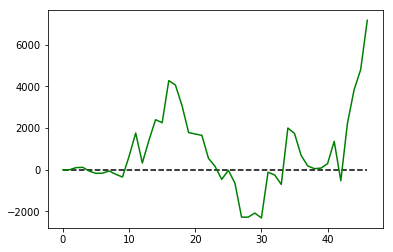

In [308]:
# plt.plot(team_total_gold[:,0],color='blue')
# plt.plot(team_total_gold[:,1],color='red')
plt.plot(team_total_gold[:,2],color='green')
plt.hlines(0,0,len(team_gold_diff_growth),linestyles='--')

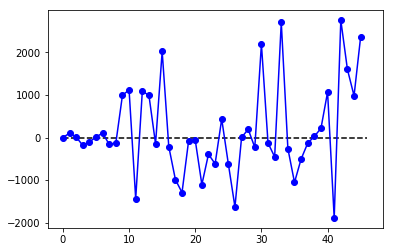

In [309]:
plt.plot(team_gold_diff_growth,color='blue',marker='o')
plt.hlines(0,0,len(team_gold_diff_growth),linestyles='--')

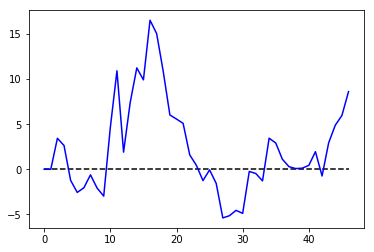

In [310]:
plt.plot(fractional_diff,color='blue')
plt.hlines(0,0,len(team_gold_diff_growth),linestyles='--')

In [311]:
lead = (fractional_diff>0)*1
m = len(lead)
percent_time_with_lead = []
for i in range(1,m):
    percent_time_with_lead.append(np.sum(lead[:i])/i)

In [315]:
for i, x in enumerate(lead):
    print(i,x,percent_time_with_lead[i])

0 0 0.0
1 0 0.0
2 1 0.3333333333333333
3 1 0.5
4 0 0.4
5 0 0.3333333333333333
6 0 0.2857142857142857
7 0 0.25
8 0 0.2222222222222222
9 0 0.2
10 1 0.2727272727272727
11 1 0.3333333333333333
12 1 0.38461538461538464
13 1 0.42857142857142855
14 1 0.4666666666666667
15 1 0.5
16 1 0.5294117647058824
17 1 0.5555555555555556
18 1 0.5789473684210527
19 1 0.6
20 1 0.6190476190476191
21 1 0.6363636363636364
22 1 0.6521739130434783
23 1 0.6666666666666666
24 0 0.64
25 0 0.6153846153846154
26 0 0.5925925925925926
27 0 0.5714285714285714
28 0 0.5517241379310345
29 0 0.5333333333333333
30 0 0.5161290322580645
31 0 0.5
32 0 0.48484848484848486
33 0 0.47058823529411764
34 1 0.4857142857142857
35 1 0.5
36 1 0.5135135135135135
37 1 0.5263157894736842
38 1 0.5384615384615384
39 1 0.55
40 1 0.5609756097560976
41 1 0.5714285714285714
42 0 0.5581395348837209
43 1 0.5681818181818182
44 1 0.5777777777777777
45 1 0.5869565217391305


IndexError: list index out of range

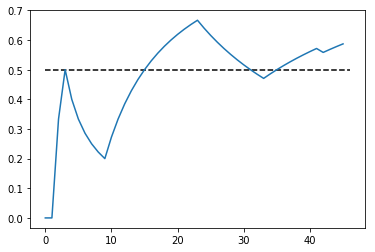

In [312]:
plt.plot(percent_time_with_lead)
plt.hlines(0.5,0,len(team_gold_diff_growth),linestyles='--')